In [54]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!cp -r /content/drive/My\ Drive/New\ Dataset /content/Dataset

Clean and analyze the dataset.


train/Bathroom

Number of images: 133
{'Toilet': 103, 'Bathtub': 11, 'Sink': 40, 'Window': 3}
Min objects per image: 1
Max objects per image: 3
Avg objects per image: 1.1804511278195489


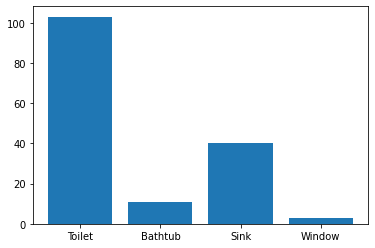


train/Bedroom

Number of images: 134
{'Bed': 147, 'Window': 17}
Min objects per image: 1
Max objects per image: 5
Avg objects per image: 1.2238805970149254


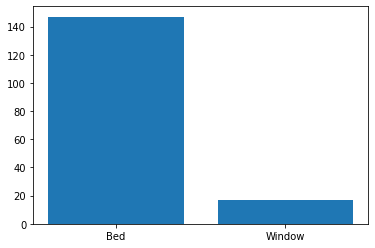


train/Kitchen

Number of images: 113
{'Sink': 24, 'Refrigerator': 42, 'Window': 6, 'Oven': 61}
Min objects per image: 1
Max objects per image: 4
Avg objects per image: 1.176991150442478


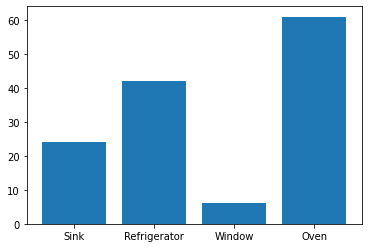


validation/Bathroom

Number of images: 21
{'Toilet': 13, 'Sink': 8, 'Bathtub': 3, 'Window': 1}
Min objects per image: 1
Max objects per image: 2
Avg objects per image: 1.1904761904761905


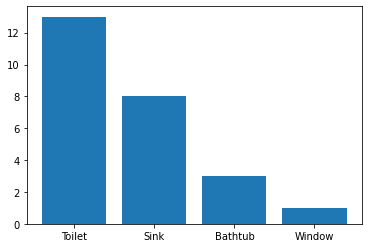


validation/Bedroom

Number of images: 18
{'Bed': 22, 'Window': 2}
Min objects per image: 1
Max objects per image: 3
Avg objects per image: 1.3333333333333333


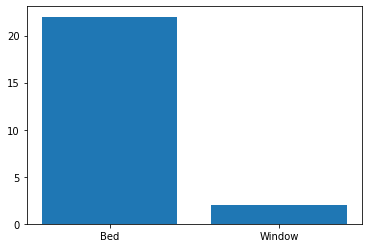


validation/Kitchen

Number of images: 24
{'Sink': 6, 'Oven': 15, 'Refrigerator': 9}
Min objects per image: 1
Max objects per image: 2
Avg objects per image: 1.25


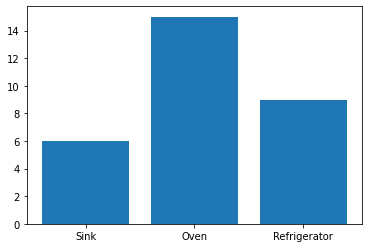


test/Bathroom

Number of images: 25
{'Toilet': 15, 'Sink': 8, 'Bathtub': 3}
Min objects per image: 1
Max objects per image: 2
Avg objects per image: 1.04


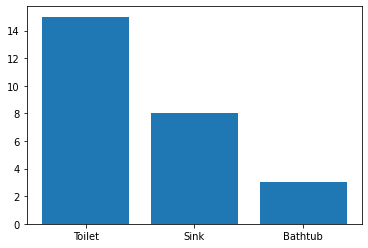


test/Bedroom

Number of images: 37
{'Bed': 40, 'Window': 4}
Min objects per image: 1
Max objects per image: 3
Avg objects per image: 1.1891891891891893


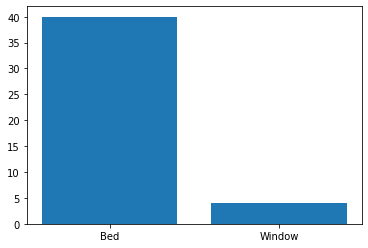


test/Kitchen

Number of images: 20
{'Sink': 5, 'Oven': 18, 'Refrigerator': 2}
Min objects per image: 1
Max objects per image: 3
Avg objects per image: 1.25


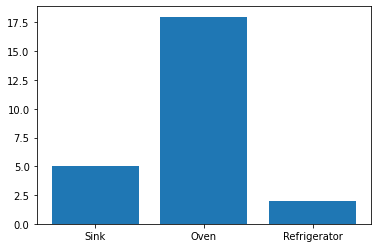

In [65]:
import os
import matplotlib.pyplot as plt

def clean_database(folder):
  image_names = os.listdir('/content/Dataset/' + folder)
  label_names = os.listdir('/content/Dataset/' + folder + '/Label')
  objects_found = {}
  num_images = len(image_names) - 1

  print("\n" + folder + "\n")
  print("Number of images: " + str(num_images))
  min = -1
  max = -1
  avg = 0

  for label in label_names:
    image_name = os.path.splitext(label)[0]+'.jpg'
    if image_name in image_names:
      f = open('/content/Dataset/' + folder + '/Label/' + label, "r")
      arr = f.read().split("\n")
      arr.remove('')

      if min == -1 or min > len(arr):
        min = len(arr)
      if max == -1 or max < len(arr):
        max = len(arr)
      avg += len(arr)

      for obj in arr:
        obj_name = obj.split(" ")[0]
        if obj_name in objects_found:
          objects_found[obj_name] += 1
        else:
          objects_found[obj_name] = 1
    else:
      os.remove('/content/Dataset/' + folder + '/Label/' + label)
    
  avg /= num_images
  print(objects_found)
  print("Min objects per image: " + str(min))
  print("Max objects per image: " + str(max))
  print("Avg objects per image: " + str(avg))

  plt.bar(objects_found.keys(), objects_found.values())
  plt.show()

clean_database('train/Bathroom')
clean_database('train/Bedroom')
clean_database('train/Kitchen')
clean_database('validation/Bathroom')
clean_database('validation/Bedroom')
clean_database('validation/Kitchen')
clean_database('test/Bathroom')
clean_database('test/Bedroom')
clean_database('test/Kitchen')

Separate data in training, validation and test.

In [49]:
import shutil

shutil.rmtree("/content/Dataset/train")
shutil.rmtree("/content/Dataset/validation")


In [50]:
import os
from random import seed, random

seed(123)
os.mkdir("/content/Dataset/train")
os.mkdir("/content/Dataset/train/Bathroom")
os.mkdir("/content/Dataset/train/Bathroom/Label")
os.mkdir("/content/Dataset/train/Bedroom")
os.mkdir("/content/Dataset/train/Bedroom/Label")
os.mkdir("/content/Dataset/train/Kitchen")
os.mkdir("/content/Dataset/train/Kitchen/Label")
os.mkdir("/content/Dataset/validation")
os.mkdir("/content/Dataset/validation/Bathroom")
os.mkdir("/content/Dataset/validation/Bathroom/Label")
os.mkdir("/content/Dataset/validation/Bedroom")
os.mkdir("/content/Dataset/validation/Bedroom/Label")
os.mkdir("/content/Dataset/validation/Kitchen")
os.mkdir("/content/Dataset/validation/Kitchen/Label")

def separate_data(folder):
  image_names = os.listdir('/content/Dataset/' + folder)
  label_names = os.listdir('/content/Dataset/' + folder + '/Label')
  for label in label_names:
    image_name = os.path.splitext(label)[0]+'.jpg'
    if image_name not in image_names:
      continue
    new_folder = "train"
    if (random() > 0.8):
      new_folder = "validation"
    os.rename("/content/Dataset/" + folder + "/" + image_name, "/content/Dataset/" + new_folder + "/" + folder + "/" + image_name)
    os.rename("/content/Dataset/" + folder + "/Label/" + label, "/content/Dataset/" + new_folder + "/" + folder + "/Label/" + label)

separate_data('Bathroom')
separate_data('Bedroom')
separate_data('Kitchen')

In [59]:
import shutil
shutil.rmtree("/content/Dataset/test")

In [60]:
import os
from random import seed, random

seed(123)
os.mkdir("/content/Dataset/test")
os.mkdir("/content/Dataset/test/Bathroom")
os.mkdir("/content/Dataset/test/Bathroom/Label")
os.mkdir("/content/Dataset/test/Bedroom")
os.mkdir("/content/Dataset/test/Bedroom/Label")
os.mkdir("/content/Dataset/test/Kitchen")
os.mkdir("/content/Dataset/test/Kitchen/Label")

def separate_data_test(folder, parent_folder):
  image_names = os.listdir('/content/Dataset/' + parent_folder + '/' + folder)
  label_names = os.listdir('/content/Dataset/' + parent_folder + '/' + folder + '/Label')
  for label in label_names:
    image_name = os.path.splitext(label)[0]+'.jpg'
    if image_name not in image_names:
      continue
    if ((parent_folder == 'train' and random() > 0.9) or (parent_folder == 'validation' and random() > 0.5)):
      os.rename("/content/Dataset/" + parent_folder + "/" + folder + "/" + image_name, "/content/Dataset/test/" + folder + "/" + image_name)
      os.rename("/content/Dataset/" + parent_folder + "/" + folder + "/Label/" + label, "/content/Dataset/test/" + folder + "/Label/" + label)

separate_data_test('Bathroom', 'validation')
separate_data_test('Bedroom', 'validation')
separate_data_test('Kitchen', 'validation')
separate_data_test('Bathroom', 'train')
separate_data_test('Bedroom', 'train')
separate_data_test('Kitchen', 'train')

In [ ]:
!zip -r /content/dataset.zip /content/Dataset